# GPT Coding From Scratch

Today we are making a GPT similar to GPT-2 which is a transformer model with only the decoder part (no encoder).

We are following the work of Adrei Karpathy which is an world leading expert on AI and ML.

Checkout the full video tutorial here for more detail:

https://www.youtube.com/watch?v=kCc8FmEb1nY&t=503s

Check out and have a play with gpt2:

https://huggingface.co/spaces/docs-demos/gpt2

According to Adrei Karpathy this code can achieve comparable performance to gpt2.

In [1]:
# We always start with a dataset to train on. Let's download the tiny shakespeare dataset
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

zsh:1: command not found: wget


In [3]:
# read it in to inspect it
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [ ]:
print("length of dataset in characters: ", len(text))

length of dataset in characters:  1115394


In [ ]:
# let's look at the first 1000 characters
print(text[:1000])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.



In [ ]:
# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)


 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
65


In [ ]:
# We are making a character level language model!
# This means we are using character level tokens.
# Not subword level token level like OpenAI's Chat GPT.

In [ ]:
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

print(encode("hii there"))
print(decode(encode("hii there")))

[46, 47, 47, 1, 58, 46, 43, 56, 43]
hii there


In [ ]:
# The abnove code can also be written like this
stoi = {}
for i,ch in enumerate(chars):
  stoi[ch] = i

itos = {}
for i,ch in enumerate(chars):
  itos[i] = ch

def encode(s):
  output = []
  for c in s:
    encoded_char = stoi[c]
    output.append(encoded_char)
  return output

def decode(l):
  output = ''
  for c in l:
    decoded_char = itos[c]
    output = output + decoded_char
  return output

print(encode("hii there"))
print(decode(encode("hii there")))

[46, 47, 47, 1, 58, 46, 43, 56, 43]
hii there


In [ ]:
# Note: Our encode is the tokenizer here. It's just converting a character into an integer.

In [ ]:
# let's now encode the entire text dataset and store it into a torch.Tensor
import torch # we use PyTorch: https://pytorch.org
data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape, data.dtype)
print(data[:1000]) # the 1000 characters we looked at earier will to the GPT look like this

torch.Size([1115394]) torch.int64
tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59,  1, 39, 56, 43,  1, 39, 50, 50,
         1, 56, 43, 57, 53, 50, 60, 43, 42,  1, 56, 39, 58, 46, 43, 56,  1, 58,
        53,  1, 42, 47, 43,  1, 58, 46, 39, 52,  1, 58, 53,  1, 44, 39, 51, 47,
        57, 46, 12,  0,  0, 13, 50, 50, 10,  0, 30, 43, 57, 53, 50, 60, 43, 42,
         8,  1, 56, 43, 57, 53, 50, 60, 43, 42,  8,  0,  0, 18, 47, 56, 57, 58,
         1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 18, 47, 56, 57, 58,  6,  1, 63,
        53, 59,  1, 49, 52, 53, 61,  1, 15, 39, 47, 59, 57,  1, 25, 39, 56, 41,
      

In [ ]:
# Now our data is the oringal text with each character encoded as integer and packed into a Pytorch tensor.
# Tensor is just a multi-dimensional array with n dimensions. An array is 1d-array, a matrix is 2d-array, a tensor is nd-array.
data

tensor([18, 47, 56,  ..., 45,  8,  0])

In [ ]:
# Our data tensor is 1d array
data.shape

torch.Size([1115394])

## Section 1: Simple Bigram Neural Network Model

Bigram language model is a model which predicts the next token using only the previous token. Therfore it's called a bigram model.

A model that predicts the next word using the 2 previous words would be called a trigram model.

We can build a model using n-words in consideration and this would be called a n-gram model.

In [ ]:
# Let's now split up the data into train and validation sets
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

In [ ]:
block_size = 8
train_data[:block_size+1]

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58])

In [ ]:
# We predict results from 1 block with block_size=8.
# Here x is the 8 first characters.
# And y is target variable which is the next letter in the sequence.
# We can only use the previous characters to predict the next character.
# If we have only 1 previous character then we only use 1 token for the next character prediction.
# If we have only 2 previous character then we only use 2 token for the next character prediction.
# We train each block from context size of 1 to context size of 8.
# This means the transformer knows how to start prediction from as little as one token.

x = train_data[:block_size]
y = train_data[1:block_size+1]
for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    print(f"when input is {context} the target: {target}")

when input is tensor([18]) the target: 47
when input is tensor([18, 47]) the target: 56
when input is tensor([18, 47, 56]) the target: 57
when input is tensor([18, 47, 56, 57]) the target: 58
when input is tensor([18, 47, 56, 57, 58]) the target: 1
when input is tensor([18, 47, 56, 57, 58,  1]) the target: 15
when input is tensor([18, 47, 56, 57, 58,  1, 15]) the target: 47
when input is tensor([18, 47, 56, 57, 58,  1, 15, 47]) the target: 58


In [ ]:
x

tensor([18, 47, 56, 57, 58,  1, 15, 47])

In [ ]:
y

tensor([47, 56, 57, 58,  1, 15, 47, 58])

In [ ]:
torch.randint(4, (5,1))

tensor([[1],
        [3],
        [0],
        [0],
        [2]])

In [ ]:
# Now we set the data into batches using get_batch function which generates a random batch of size 4

torch.manual_seed(1337)
batch_size = 4 # how many independent sequences will we process in parallel?
block_size = 8 # what is the maximum context length for predictions?

def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,)) # get 4 random integers ranging between 0 and ( len(data) - block_size ), into an array with length of batch_size
    # print('ix', ix)
    x = torch.stack([data[i:i+block_size] for i in ix]) # loop through each random integer ix and generate batch x
    y = torch.stack([data[i+1:i+block_size+1] for i in ix]) # loop through each random integer ix and generate batch y
    return x, y

xb, yb = get_batch('train')
print('inputs:')
print(xb.shape)
print(xb)
print('targets:')
print(yb.shape)
print(yb)

print('----')

for b in range(batch_size): # batch dimension
    for t in range(block_size): # time dimension
        context = xb[b, :t+1]
        target = yb[b,t]
        print(f"when input is {context.tolist()} the target: {target}")

inputs:
torch.Size([4, 8])
tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])
targets:
torch.Size([4, 8])
tensor([[43, 58,  5, 57,  1, 46, 43, 39],
        [53, 56,  1, 58, 46, 39, 58,  1],
        [58,  1, 58, 46, 39, 58,  1, 46],
        [17, 27, 10,  0, 21,  1, 54, 39]])
----
when input is [24] the target: 43
when input is [24, 43] the target: 58
when input is [24, 43, 58] the target: 5
when input is [24, 43, 58, 5] the target: 57
when input is [24, 43, 58, 5, 57] the target: 1
when input is [24, 43, 58, 5, 57, 1] the target: 46
when input is [24, 43, 58, 5, 57, 1, 46] the target: 43
when input is [24, 43, 58, 5, 57, 1, 46, 43] the target: 39
when input is [44] the target: 53
when input is [44, 53] the target: 56
when input is [44, 53, 56] the target: 1
when input is [44, 53, 56, 1] the target: 58
when input is [44, 53, 56, 1, 58] the target: 46
when input is [44, 53

In [ ]:
xb

tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])

In [ ]:
yb

tensor([[43, 58,  5, 57,  1, 46, 43, 39],
        [53, 56,  1, 58, 46, 39, 58,  1],
        [58,  1, 58, 46, 39, 58,  1, 46],
        [17, 27, 10,  0, 21,  1, 54, 39]])

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F

In [ ]:
vocab_size

65

The nn.Embedding layer is just like a single fully connected neural network layer but without bias. Here the nn-layer will take input of vocab_size and will output array of size vocab_size. So this is 65 inputs and 65 outputs. But instead of doing matrix multiplication the nn.Embedding does a look up table instead where 1 input = 1 array of length 65. We can think of nn.Embedding as a look up table of size 65x65.

In [ ]:
token_embedding_table = nn.Embedding(vocab_size, vocab_size)

In [ ]:
token_embedding_table

Embedding(65, 65)

In [ ]:
xb

tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])

In [ ]:
# This tells us the the tensor is from the result of a proccess which is differentiable
# Therefore it gan be backpropagated and the loss gradient can be calculated with respect to the function's parameters

embedding_result = token_embedding_table(xb)
embedding_result

tensor([[[-1.1730,  0.1125,  1.3759,  ...,  0.2143,  1.5742, -0.1005],
         [-1.8161,  0.9116,  0.2748,  ..., -0.2251, -1.2663, -0.1214],
         [-0.3795,  0.3194,  2.6585,  ...,  1.2165, -0.4437, -0.4673],
         ...,
         [-0.1667,  0.2752, -0.6079,  ..., -0.9631, -0.1148,  0.6909],
         [ 1.9412,  0.2296,  0.7117,  ...,  1.2448, -0.9663, -1.0425],
         [-1.8161,  0.9116,  0.2748,  ..., -0.2251, -1.2663, -0.1214]],

        [[-1.2892,  1.5030, -0.5783,  ...,  0.2987,  0.0178,  0.1400],
         [ 0.5862, -0.6468, -0.7656,  ...,  1.0883,  0.5236, -0.8487],
         [-0.1845,  1.6679, -0.3512,  ..., -0.7535,  0.4537,  1.3755],
         ...,
         [ 1.9412,  0.2296,  0.7117,  ...,  1.2448, -0.9663, -1.0425],
         [ 0.8124, -0.5741, -0.0039,  ...,  1.5699,  0.1447,  1.3065],
         [-0.3795,  0.3194,  2.6585,  ...,  1.2165, -0.4437, -0.4673]],

        [[-0.2119,  0.5506,  0.2701,  ..., -0.0877, -1.2754,  1.8154],
         [-0.3795,  0.3194,  2.6585,  ...,  1

In [ ]:
embedding_result.shape

torch.Size([4, 8, 65])

In [ ]:
embedding_result[0]

tensor([[-1.1730,  0.1125,  1.3759,  0.7492,  1.4849, -0.8661, -1.0219, -1.1038,
          0.7140, -1.2920, -0.0558, -0.4382, -0.7136, -1.4831,  1.3023, -1.2810,
         -1.0120, -1.3593, -1.3715, -0.1948,  0.7719,  2.9956,  0.2084, -1.6306,
          0.1883, -1.2192, -0.0167, -0.4747,  0.7806,  1.2904,  0.0471,  1.4801,
          0.5039, -1.5115, -1.0605,  0.6224,  1.2815,  0.4047,  0.0632,  0.5846,
          1.2385, -0.9951,  0.1798, -1.5204,  0.6128,  0.9535, -0.0584, -0.4370,
          0.1761,  0.2057,  1.2542,  1.2402, -0.6446, -0.5180,  0.8405, -1.3159,
          0.3053, -0.9158, -0.6527,  1.9068, -1.4153, -0.0123,  0.2143,  1.5742,
         -0.1005],
        [-1.8161,  0.9116,  0.2748, -0.1202, -0.1775,  0.2001,  0.0552,  1.0083,
          0.4720, -0.2786,  2.2198,  0.5621,  0.4772, -0.1048,  1.6336,  2.7827,
         -0.7032, -1.5578,  0.9512, -0.5864,  0.4626, -1.4224,  0.8658, -0.4453,
         -0.7926,  0.8764, -1.1018,  0.1059,  0.0639,  0.1388, -0.5555,  0.1258,
         

In [ ]:
B, T, C = embedding_result.shape

In [ ]:
embedding_result.shape

torch.Size([4, 8, 65])

In [ ]:
B*T

32

In [ ]:
embedding_result_reshaped = embedding_result.view(B*T, C)

In [ ]:
embedding_result_reshaped

tensor([[-1.1730,  0.1125,  1.3759,  ...,  0.2143,  1.5742, -0.1005],
        [-1.8161,  0.9116,  0.2748,  ..., -0.2251, -1.2663, -0.1214],
        [-0.3795,  0.3194,  2.6585,  ...,  1.2165, -0.4437, -0.4673],
        ...,
        [ 1.0413,  0.9522, -0.5893,  ...,  0.6523, -1.1228, -0.5896],
        [-0.1667,  0.2752, -0.6079,  ..., -0.9631, -0.1148,  0.6909],
        [-0.7711, -0.0528, -1.8655,  ...,  0.0712, -0.3004, -1.7918]],
       grad_fn=<ViewBackward0>)

In [ ]:
yb_reshaped = yb.view(B*T)
yb_reshaped

tensor([43, 58,  5, 57,  1, 46, 43, 39, 53, 56,  1, 58, 46, 39, 58,  1, 58,  1,
        58, 46, 39, 58,  1, 46, 17, 27, 10,  0, 21,  1, 54, 39])

In [ ]:
# We can calcualte the feedforward result of our NN network

loss = F.cross_entropy(embedding_result_reshaped,yb_reshaped)
loss

tensor(4.6630, grad_fn=<NllLossBackward0>)

In [ ]:
# Put it all together into a class

import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)

class BigramLanguageModel(nn.Module):

    def __init__(self, vocab_size):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

    def forward(self, idx, targets=None):

        # idx and targets are both (B,T) tensor of integers
        logits = self.token_embedding_table(idx) # (B,T,C)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # get the predictions
            logits, loss = self(idx)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx


In [ ]:
m = BigramLanguageModel(vocab_size)

In [ ]:
logits, loss = m(xb, yb)
print(logits.shape)
print(loss)

torch.Size([32, 65])
tensor(4.8786, grad_fn=<NllLossBackward0>)


In [ ]:
torch.zeros((1, 1), dtype=torch.long)

tensor([[0]])

In [ ]:
# Do prediction and generate 100 tokens

generation_result = m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=100)[0].tolist()
decode(generation_result)

"\nSr?qP-QWktXoL&jLDJgOLVz'RIoDqHdhsV&vLLxatjscMpwLERSPyao.qfzs$Ys$zF-w,;eEkzxjgCKFChs!iWW.ObzDnxA Ms$3"

In [ ]:
# create a PyTorch optimizer
optimizer = torch.optim.AdamW(m.parameters(), lr=1e-3)

In [ ]:
batch_size = 32
for steps in range(10000): # increase number of steps for good results...

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = m(xb, yb)
    optimizer.zero_grad(set_to_none=True) # set gradients to zero, this is required because default running of .backward() does gradient accumulation for mini batch
    loss.backward()
    optimizer.step()

    if steps%1000==0:
      print('loss', loss.item())

print(loss.item())


loss 4.704006195068359
loss 3.7031264305114746
loss 3.1371781826019287
loss 2.776794672012329
loss 2.5844571590423584
loss 2.5105180740356445
loss 2.531585931777954
loss 2.504757881164551
loss 2.4696717262268066
loss 2.4838879108428955
2.5727508068084717


In [ ]:
# Do prediction and generate 100 tokens

generation_result = m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=100)[0].tolist()
decode(generation_result)

"\nIyoteng h hasbe pave pirance\nRie hicomyonthar's\nPlinseard ith henoure wounonthioneir thondy, y helti"

## Section 2: The mathematical trick in self-attention

In [ ]:
# toy example illustrating how matrix multiplication can be used for a "weighted aggregation"
torch.manual_seed(42)
a = torch.tril(torch.ones(3, 3))
a = a / torch.sum(a, 1, keepdim=True)
b = torch.randint(0,10,(3,2)).float()
c = a @ b
print('a=')
print(a)
print('--')
print('b=')
print(b)
print('--')
print('c=')
print(c)

a=
tensor([[1.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000],
        [0.3333, 0.3333, 0.3333]])
--
b=
tensor([[2., 7.],
        [6., 4.],
        [6., 5.]])
--
c=
tensor([[2.0000, 7.0000],
        [4.0000, 5.5000],
        [4.6667, 5.3333]])


In [ ]:
# consider the following toy example:

torch.manual_seed(1337)
B,T,C = 4,8,2 # batch, time, channels
x = torch.randn(B,T,C)
x.shape

torch.Size([4, 8, 2])

In [ ]:
x

tensor([[[ 0.1808, -0.0700],
         [-0.3596, -0.9152],
         [ 0.6258,  0.0255],
         [ 0.9545,  0.0643],
         [ 0.3612,  1.1679],
         [-1.3499, -0.5102],
         [ 0.2360, -0.2398],
         [-0.9211,  1.5433]],

        [[ 1.3488, -0.1396],
         [ 0.2858,  0.9651],
         [-2.0371,  0.4931],
         [ 1.4870,  0.5910],
         [ 0.1260, -1.5627],
         [-1.1601, -0.3348],
         [ 0.4478, -0.8016],
         [ 1.5236,  2.5086]],

        [[-0.6631, -0.2513],
         [ 1.0101,  0.1215],
         [ 0.1584,  1.1340],
         [-1.1539, -0.2984],
         [-0.5075, -0.9239],
         [ 0.5467, -1.4948],
         [-1.2057,  0.5718],
         [-0.5974, -0.6937]],

        [[ 1.6455, -0.8030],
         [ 1.3514, -0.2759],
         [-1.5108,  2.1048],
         [ 2.7630, -1.7465],
         [ 1.4516, -1.5103],
         [ 0.8212, -0.2115],
         [ 0.7789,  1.5333],
         [ 1.6097, -0.4032]]])

### Method 1

In [ ]:
# We want x[b,t] = mean_{i<=t} x[b,i]
xbow = torch.zeros((B,T,C))
for b in range(B):
    for t in range(T):
        xprev = x[b,:t+1] # (t,C)
        xbow[b,t] = torch.mean(xprev, 0)


In [ ]:
torch.set_printoptions(precision=4)

### Method 2

In [ ]:
# version 2: using matrix multiply for a weighted aggregation
wei = torch.tril(torch.ones(T, T))
wei = wei / wei.sum(1, keepdim=True)
xbow2 = wei @ x # (B, T, T) @ (B, T, C) ----> (B, T, C)
torch.allclose(xbow, xbow2, rtol=1e-03)

True

In [ ]:
xbow.shape

torch.Size([4, 8, 2])

In [ ]:
xbow2.shape

torch.Size([4, 8, 2])

In [ ]:
torch.ones(T, T)

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [ ]:
torch.tril(torch.ones(T, T))

tensor([[1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [ ]:
wei

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000],
        [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.0000],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]])

In [ ]:
x

tensor([[[ 0.1808, -0.0700],
         [-0.3596, -0.9152],
         [ 0.6258,  0.0255],
         [ 0.9545,  0.0643],
         [ 0.3612,  1.1679],
         [-1.3499, -0.5102],
         [ 0.2360, -0.2398],
         [-0.9211,  1.5433]],

        [[ 1.3488, -0.1396],
         [ 0.2858,  0.9651],
         [-2.0371,  0.4931],
         [ 1.4870,  0.5910],
         [ 0.1260, -1.5627],
         [-1.1601, -0.3348],
         [ 0.4478, -0.8016],
         [ 1.5236,  2.5086]],

        [[-0.6631, -0.2513],
         [ 1.0101,  0.1215],
         [ 0.1584,  1.1340],
         [-1.1539, -0.2984],
         [-0.5075, -0.9239],
         [ 0.5467, -1.4948],
         [-1.2057,  0.5718],
         [-0.5974, -0.6937]],

        [[ 1.6455, -0.8030],
         [ 1.3514, -0.2759],
         [-1.5108,  2.1048],
         [ 2.7630, -1.7465],
         [ 1.4516, -1.5103],
         [ 0.8212, -0.2115],
         [ 0.7789,  1.5333],
         [ 1.6097, -0.4032]]])

In [ ]:
wei@x

tensor([[[ 0.1808, -0.0700],
         [-0.0894, -0.4926],
         [ 0.1490, -0.3199],
         [ 0.3504, -0.2238],
         [ 0.3525,  0.0545],
         [ 0.0688, -0.0396],
         [ 0.0927, -0.0682],
         [-0.0341,  0.1332]],

        [[ 1.3488, -0.1396],
         [ 0.8173,  0.4127],
         [-0.1342,  0.4395],
         [ 0.2711,  0.4774],
         [ 0.2421,  0.0694],
         [ 0.0084,  0.0020],
         [ 0.0712, -0.1128],
         [ 0.2527,  0.2149]],

        [[-0.6631, -0.2513],
         [ 0.1735, -0.0649],
         [ 0.1685,  0.3348],
         [-0.1621,  0.1765],
         [-0.2312, -0.0436],
         [-0.1015, -0.2855],
         [-0.2593, -0.1630],
         [-0.3015, -0.2293]],

        [[ 1.6455, -0.8030],
         [ 1.4985, -0.5395],
         [ 0.4954,  0.3420],
         [ 1.0623, -0.1802],
         [ 1.1401, -0.4462],
         [ 1.0870, -0.4071],
         [ 1.0430, -0.1299],
         [ 1.1138, -0.1641]]])

### Method 3

In [ ]:
# version 3: use Softmax
tril = torch.tril(torch.ones(T, T))
wei = torch.zeros((T,T))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=-1)
xbow3 = wei @ x
torch.allclose(xbow, xbow3, rtol=1e-03)

True

In [ ]:
tril = torch.tril(torch.ones(T, T))
tril

tensor([[1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [ ]:
wei = torch.zeros((T,T))
wei

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
wei = wei.masked_fill(tril == 0, float('-inf'))
wei

tensor([[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
wei = F.softmax(wei, dim=-1)
wei

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000],
        [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.0000],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]])

In [ ]:
# version 4: self-attention!
torch.manual_seed(1337)
B,T,C = 4,8,32 # batch, time, channels
x = torch.randn(B,T,C)

# let's see a single Head perform self-attention
head_size = 16
key = nn.Linear(C, head_size, bias=False)
query = nn.Linear(C, head_size, bias=False)
value = nn.Linear(C, head_size, bias=False)
k = key(x)   # (B, T, 16)
q = query(x) # (B, T, 16)
wei =  q @ k.transpose(-2, -1) # (B, T, 16) @ (B, 16, T) ---> (B, T, T)

tril = torch.tril(torch.ones(T, T))
#wei = torch.zeros((T,T))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=-1)

v = value(x)
out = wei @ v
#out = wei @ x

out.shape

torch.Size([4, 8, 16])

In [ ]:
key

Linear(in_features=32, out_features=16, bias=False)

In [ ]:
k.shape

torch.Size([4, 8, 16])

In [ ]:
wei =  q @ k.transpose(-2, -1) # (B, T, 16) @ (B, 16, T) ---> (B, T, T)
wei[0]

tensor([[-1.7629, -1.3011,  0.5652,  2.1616, -1.0674,  1.9632,  1.0765, -0.4530],
        [-3.3334, -1.6556,  0.1040,  3.3782, -2.1825,  1.0415, -0.0557,  0.2927],
        [-1.0226, -1.2606,  0.0762, -0.3813, -0.9843, -1.4303,  0.0749, -0.9547],
        [ 0.7836, -0.8014, -0.3368, -0.8496, -0.5602, -1.1701, -1.2927, -1.0260],
        [-1.2566,  0.0187, -0.7880, -1.3204,  2.0363,  0.8638,  0.3719,  0.9258],
        [-0.3126,  2.4152, -0.1106, -0.9931,  3.3449, -2.5229,  1.4187,  1.2196],
        [ 1.0876,  1.9652, -0.2621, -0.3158,  0.6091,  1.2616, -0.5484,  0.8048],
        [-1.8044, -0.4126, -0.8306,  0.5899, -0.7987, -0.5856,  0.6433,  0.6303]],
       grad_fn=<SelectBackward0>)

In [ ]:
wei = wei.masked_fill(tril == 0, float('-inf'))
wei[0]

tensor([[-1.7629,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf],
        [-3.3334, -1.6556,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf],
        [-1.0226, -1.2606,  0.0762,    -inf,    -inf,    -inf,    -inf,    -inf],
        [ 0.7836, -0.8014, -0.3368, -0.8496,    -inf,    -inf,    -inf,    -inf],
        [-1.2566,  0.0187, -0.7880, -1.3204,  2.0363,    -inf,    -inf,    -inf],
        [-0.3126,  2.4152, -0.1106, -0.9931,  3.3449, -2.5229,    -inf,    -inf],
        [ 1.0876,  1.9652, -0.2621, -0.3158,  0.6091,  1.2616, -0.5484,    -inf],
        [-1.8044, -0.4126, -0.8306,  0.5899, -0.7987, -0.5856,  0.6433,  0.6303]],
       grad_fn=<SelectBackward0>)

In [ ]:
wei = F.softmax(wei, dim=-1)
wei[0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1574, 0.8426, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2088, 0.1646, 0.6266, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5792, 0.1187, 0.1889, 0.1131, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0294, 0.1052, 0.0469, 0.0276, 0.7909, 0.0000, 0.0000, 0.0000],
        [0.0176, 0.2689, 0.0215, 0.0089, 0.6812, 0.0019, 0.0000, 0.0000],
        [0.1691, 0.4066, 0.0438, 0.0416, 0.1048, 0.2012, 0.0329, 0.0000],
        [0.0210, 0.0843, 0.0555, 0.2297, 0.0573, 0.0709, 0.2423, 0.2391]],
       grad_fn=<SelectBackward0>)

In [ ]:
# Think about these weights as affilliation score between each token
# This tells you how much the next word depends on which previous words
# The greater the weight the greater the dependency

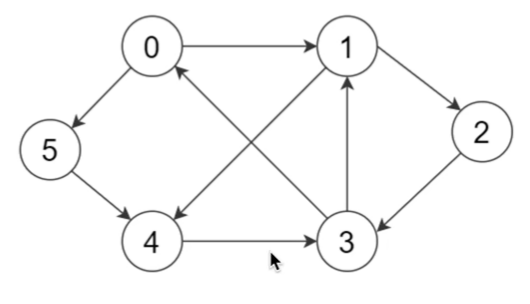

Notes:
- Attention is a **communication mechanism**. Can be seen as nodes in a directed graph looking at each other and aggregating information with a weighted sum from all nodes that point to them, with data-dependent weights.
- There is no notion of space. Attention simply acts over a set of vectors. This is why we need to positionally encode tokens.
- Each example across batch dimension is of course processed completely independently and never "talk" to each other
- In an "encoder" attention block just delete the single line that does masking with `tril`, allowing all tokens to communicate. This block here is called a "decoder" attention block because it has triangular masking, and is usually used in autoregressive settings, like language modeling.
- "self-attention" just means that the keys and values are produced from the same source as queries. In "cross-attention", the queries still get produced from x, but the keys and values come from some other, external source (e.g. an encoder module)
- "Scaled" attention additional divides `wei` by 1/sqrt(head_size). This makes it so when input Q,K are unit variance, wei will be unit variance too and Softmax will stay diffuse and not saturate too much. Illustration below

In [ ]:
k = torch.randn(B,T,head_size)
q = torch.randn(B,T,head_size)
wei = q @ k.transpose(-2, -1)

In [ ]:
k.var()

tensor(1.0449)

In [ ]:
q.var()

tensor(1.0700)

In [ ]:
wei.var()

tensor(17.4690)

In [ ]:
k = torch.randn(B,T,head_size)
q = torch.randn(B,T,head_size)
wei = q @ k.transpose(-2, -1) * head_size**-0.5

In [ ]:
k.var()

tensor(0.9006)

In [ ]:
q.var()

tensor(1.0037)

In [ ]:
wei.var()

tensor(0.9957)

In [ ]:
torch.softmax(torch.tensor([0.1, -0.2, 0.3, -0.2, 0.5]), dim=-1)

tensor([0.1925, 0.1426, 0.2351, 0.1426, 0.2872])

In [ ]:
torch.softmax(torch.tensor([0.1, -0.2, 0.3, -0.2, 0.5])*8, dim=-1) # gets too peaky, converges to one-hot

tensor([0.0326, 0.0030, 0.1615, 0.0030, 0.8000])

In [ ]:
class LayerNorm1d: # (used to be BatchNorm1d)

  def __init__(self, dim, eps=1e-5, momentum=0.1):
    self.eps = eps
    self.gamma = torch.ones(dim)
    self.beta = torch.zeros(dim)

  def __call__(self, x):
    # calculate the forward pass
    xmean = x.mean(1, keepdim=True) # batch mean
    xvar = x.var(1, keepdim=True) # batch variance
    xhat = (x - xmean) / torch.sqrt(xvar + self.eps) # normalize to unit variance
    self.out = self.gamma * xhat + self.beta
    return self.out

  def parameters(self):
    return [self.gamma, self.beta]

torch.manual_seed(1337)
module = LayerNorm1d(100)
x = torch.randn(32, 100) # batch size 32 of 100-dimensional vectors
x = module(x)
x.shape

torch.Size([32, 100])

## Section 3: Transformer Model (Decoder Only) - Putting it all together pre-training

Here we will be building only the decoder side of the model since we are only doing text generation. We do not have any text inputs so we don't need the encoder model.


- Left side - encoder model

- Right side - decoder model

Here is the famous transformer model.

You can see here that we will need additional components such as:
- positional encoding
- residual connection addition
- normalization
- each attention layer has a feedforward at the end to do some computation
- using multi-head attention which works in parallel
- using mutli-stacks of multi-head attention making the network deeper

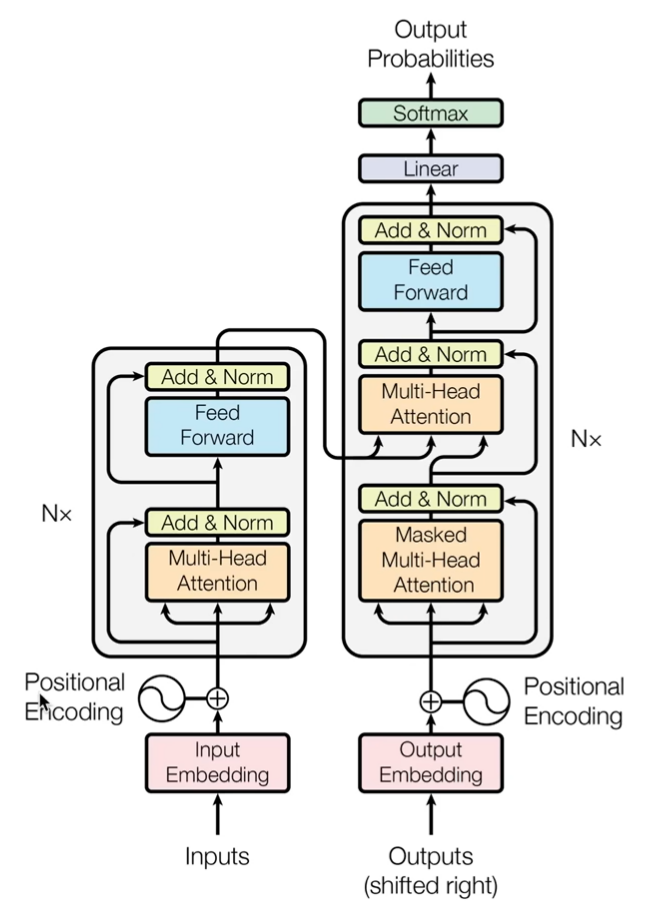

**Residual Connection**

Provide gradient superhighway when doing backprop. For deep gradient networks we have problem of training neurons in early layers during backrpop due to vaninshing / exploding gradients. The addition junction ensures that gradients from the output layers are fedback to the intitial layers since the gradients remain the same after the addition junction.

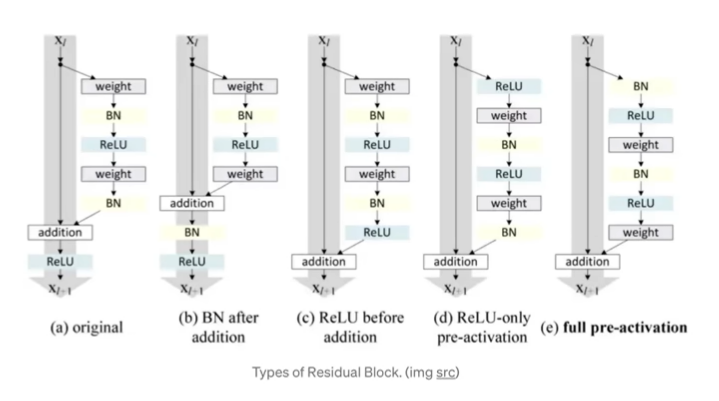

**Layer Normalization**

https://www.youtube.com/watch?v=2V3Uduw1zwQ

**Dropout Layer**

Dropout layer forces all neurons into action. When we train we randomly drop out neurons forcing all neurons to take responsibility some times. This means the gradients get to flow through the different neurons during backprop and hence we train them to help predict the right output. You can think about this like training many models separately (each configuration is a separate model) which are then combined as an ensemble.

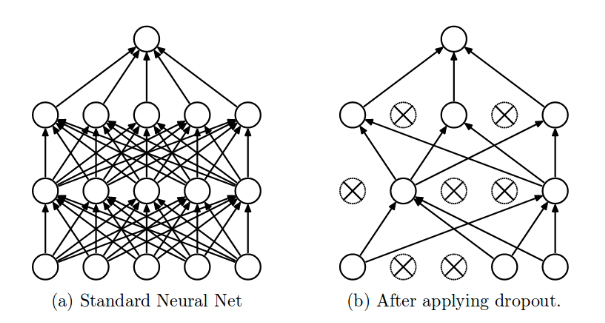

### Full finished code, for reference

You may want to refer directly to the git repo instead though.[link text](https://)

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# hyperparameters
batch_size = 16 # how many independent sequences will we process in parallel?
block_size = 32 # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 100
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 64
n_head = 4
n_layer = 4
dropout = 0.0
# ------------

torch.manual_seed(1337)

# wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B,T,C = x.shape
        # NOTE: k_shape = 16, 32, 64

        k = self.key(x)   # (B,T,C)
        q = self.query(x) # (B,T,C)

        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T)

        # NOTE: Because head_size = 16 therfore
        # k_shape = 16, 32, 16
        # q_shape = 16, 32, 16
        # wei_shape = 16, 32, 32

        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        wei = self.dropout(wei)

        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,C)

        out = wei @ v # (B, T, T) @ (B, T, C) -> (B, T, C)

        # NOTE: The shape for matrix multiplication between affiliation matrix and transformed input v
        # wei_shape = 16, 32, 32
        # v_shape   = 16, 32, 16
        # out_shape = 16, 32, 16

        return out

class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1) # NOTE: each h(x) has shape (16, 32, 16) and concatenated x4 times to form output with shape (16, 32, 64)
        out = self.dropout(self.proj(out))  # NOTE: Pass through extra linear computation layer and then apply dropout, output has shape of (16, 32, 64)

        return out

class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head        # NOTE: Head size is embedding size divided by 4 because we will concatenate the results from 4 heads to form the embedding result
        self.sa = MultiHeadAttention(n_head, head_size)  # NOTE: Multi-head attention has output has shape of (16, 32, 64)
        self.ffwd = FeedFoward(n_embd)      # NOTE: Another additional computational fully connected layer, expand x4 then back to original shape of 64
        self.ln1 = nn.LayerNorm(n_embd)     # NOTE: Normalize output layer
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))        # NOTE: Adding Residual Connection 1 - do normalization and addtion before self-attention layer (Not same order as diagram)
        x = x + self.ffwd(self.ln2(x))      # NOTE: Adding Residual Connection 2 - do normalization and addtion before feed-forward layer (Not same order as diagram)
        return x

# super simple bigram model
class BigramLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)]) # stacks of self attention layer, here n_layer=4
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, vocab_size) # final linear layer with input of n_emb=32 and output of vocab_size=65

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        tok_emb = self.token_embedding_table(idx) # (B,T,C) shape= 16, 32, 64
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C) shape= 32, 64
        x = tok_emb + pos_emb # (B,T,C) # NOTE: add token embedding to position embedding shape= 16, 32, 64

        x = self.blocks(x) # (B,T,C)    # NOTE: run the results through the multi-headed attention block with shape 16,32,64
        x = self.ln_f(x) # (B,T,C)
        logits = self.lm_head(x) # (B,T,vocab_size) # NOTE: Final result is a logits array with 65 entries representing the vocab size

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:]
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx



In [ ]:
model = BigramLanguageModel()
m = model.to(device)
# print the number of parameters in the model
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

0.209729 M parameters


In [ ]:
xb.shape

torch.Size([16, 32])

In [ ]:
xb.shape

torch.Size([16, 32])

In [ ]:
forward_result = m(xb)

In [ ]:
forward_result[0].shape

torch.Size([16, 32, 65])

In [ ]:
# Train the model

# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)



step 0: train loss 4.4116, val loss 4.4022
step 100: train loss 2.6568, val loss 2.6670
step 200: train loss 2.5090, val loss 2.5059
step 300: train loss 2.4196, val loss 2.4338
step 400: train loss 2.3504, val loss 2.3566
step 500: train loss 2.2965, val loss 2.3129
step 600: train loss 2.2410, val loss 2.2500
step 700: train loss 2.2057, val loss 2.2191
step 800: train loss 2.1633, val loss 2.1864
step 900: train loss 2.1244, val loss 2.1510
step 1000: train loss 2.1038, val loss 2.1308
step 1100: train loss 2.0707, val loss 2.1197
step 1200: train loss 2.0377, val loss 2.0800
step 1300: train loss 2.0268, val loss 2.0650
step 1400: train loss 1.9918, val loss 2.0356
step 1500: train loss 1.9697, val loss 2.0293
step 1600: train loss 1.9645, val loss 2.0499
step 1700: train loss 1.9404, val loss 2.0129
step 1800: train loss 1.9095, val loss 1.9951
step 1900: train loss 1.9067, val loss 1.9855
step 2000: train loss 1.8854, val loss 1.9948
step 2100: train loss 1.8727, val loss 1.9766


In [ ]:
print(decode(m.generate(context, max_new_tokens=2000)[0].tolist()))


And thou tougesome the aways I dot?
Now, grave to becaunfor with dightnerious givent, I but his gon,
Suse, didrences wife; her
take the not
Rayth have all malter-dry me yough:
What Have shee.

SICINIUS:
Is am thire;
Nor a doth that make tread steed;
Pirdied Desumph, now betwered's prettedy.
Senst you not, to this fawn urtwon
A beor her the my pactated with his fourtuny,
Far is no his sut, you:--hont mandever's in
grean mack.

OXFORD:
Your amnother Frield, whinds
were his groy, now you read of tomm-hon-before hold,
But cove pleasty of my his
will se to his Gom
Wears is thurgets gives there's up?
I would loves minost.

BOWNIRD:
Some.
Where you nock: so,
Cave, my what a lasting that man to teetens
To his much of so you
was facentiong to you mine, and pent;
Nor should since the vollation in in by his quirt.
If Havanged, way his bomise.

CORIOLANA:
Nor hear your and-druph
Behalt but you feld was that resding is is these lost;
And sh, I hortain, I shou'll greart forge.
not Plood, thy father

**Complete Training Steps**

What we did in this exercise was pre-training for the decoder part of the transform neural network

After pre-training Chat GPT does the steps shown in the diagram shown below to complete the training for a question answering transformer model.

Normally we will have to pre-train the model and the follow up by supervised fine-tuning and then optionally apply RLHF (Reinforcement Learning with Human Feedback).


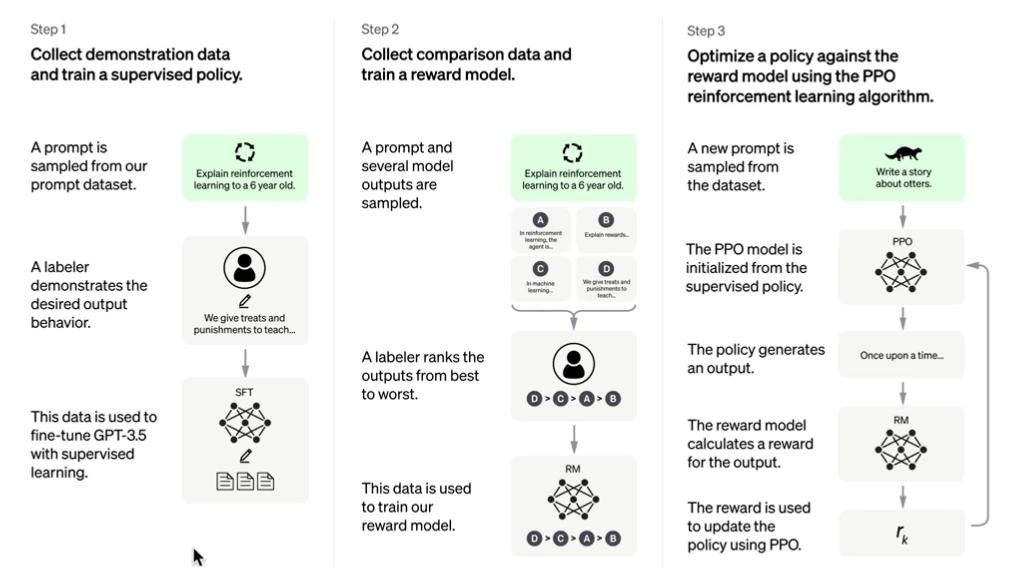